# Perceptrón Multicapa: Caso práctico II

## Dataset

La base de datos del MNIST (base de datos modificada del Instituto Nacional de Normas y Tecnología) es una gran base de datos de dígitos manuscritos que se utiliza comúnmente para la capacitación de diversos sistemas de procesamiento de imágenes. La base de datos también se utiliza ampliamente para la capacitación y el ensayo en el campo del aprendizaje automático. Se creó "remezclando" las muestras de los conjuntos de datos originales del NIST. Los creadores consideraron que, dado que el conjunto de datos de capacitación del NIST fue tomado de los empleados de la Oficina del Censo de los Estados Unidos, mientras que el conjunto de datos de prueba fue tomado de los estudiantes de secundaria de los Estados Unidos, no era muy adecuado para los experimentos de aprendizaje automático. Además, las imágenes en blanco y negro del NIST fueron normalizadas para que encajaran en un cuadro delimitador de 28x28 píxeles, lo que introdujo niveles de escala de grises.

La base de datos del MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba. La mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de entrenamiento del NIST, mientras que la otra mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de pruebas del NIST.Los creadores originales de la base de datos mantienen una lista de algunos de los métodos probados en ella. En su papel original, utilizan una máquina de soporte vectorial para obtener una tasa de error del 0,8%. En 2017 se ha publicado un conjunto de datos ampliado similar al MNIST llamado EMNIST, que contiene 240.000 imágenes de entrenamiento y 40.000 imágenes de prueba de dígitos y caracteres escritos a mano.

## Enunciado

En este caso de uso práctico vamos a recuperar el ejercicio de clasificación de imágenes que realizamos en el apartado anterior para intentar mejorarlo aplicando un Perceptrón Multicapa.

## 1. Lectura del conjunto de datos

In [10]:
# Importamos el conjunto de datos
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

E:\FRANCO\Anaconda\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [11]:
# Conviertiendo el conjunto de datos en un DataFrame de Pandas
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Visualización del conjunto de datos

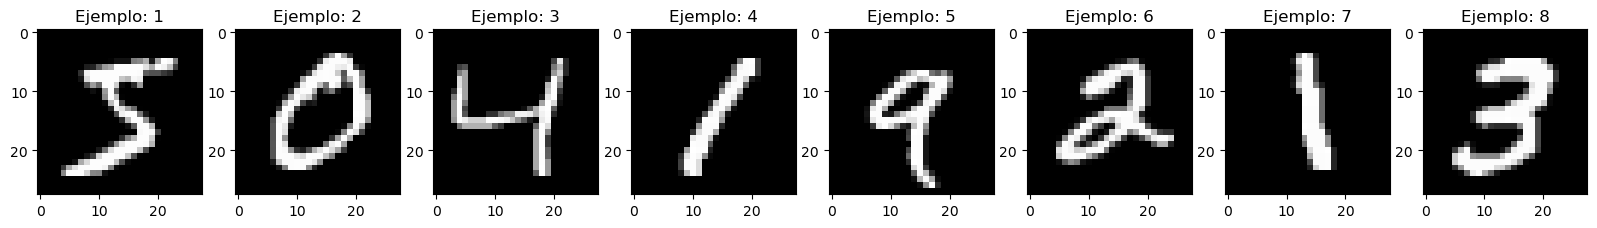

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), mnist.data[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

## 3. División del conjunto de datos

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.15) #porcentaje de pruebas

In [26]:
print(len(X_train))
print(len(X_test))

59500
10500


## 4. Entrenamiento del algoritmo

In [29]:
from sklearn.neural_network import MLPClassifier

#uso 50 neuronas en 1 sola hidden layer. Activation='logistic' es la funcion sigmoide como funcion de activacion
#solver='sdg' es una variacion del Gradient Descent como funcion de optimizacion(stocastic Gradient Descent)

clf = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', solver='sgd')
clf.fit(X_train, y_train)

E:\FRANCO\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), solver='sgd')

In [37]:
# Número de capas del perceptrón multicapa
clf.n_layers_
#3 capas: input, hidden_layer1, output

3

In [35]:
# Número de outputs del perceptrón multicapa
clf.n_outputs_
#tengo 10 salidas por que son los posibles numeros (del 0 al 9)

10

In [ ]:
784 * 10 + 10

In [39]:
# Número de parámetros que forman el modelo
clf.coefs_[0].shape

(784, 50)

In [47]:
# Dimensiones de la primera capa (hidden layer)
clf.coefs_[1]

array([[-4.21629322e-01,  7.91635787e-01,  4.34047508e-01,
        -1.51313269e-01,  7.36428046e-01, -4.66996096e-02,
         3.65901774e-01, -4.88082823e-01, -1.00753469e+00,
         2.85651827e-01],
       [ 7.90942269e-01, -4.84700412e-01,  1.02871032e+00,
        -5.55975739e-01,  2.67508705e-01, -4.15859418e-01,
         3.22734437e-01, -5.01204009e-01, -8.46697896e-01,
         1.47187994e-01],
       [ 4.00489897e-01,  5.58246806e-01, -1.19016198e-01,
         1.93348168e-01,  4.17036146e-01,  5.93884371e-01,
         3.13657003e-01, -4.97808673e-01, -4.75385819e-01,
        -1.10119553e+00],
       [ 5.78700841e-01, -7.21508835e-01, -8.93380787e-01,
        -3.46619564e-01,  1.73212238e-01, -4.79143527e-02,
         6.67809612e-01,  5.57926324e-01, -1.20760505e-02,
         1.80958760e-01],
       [ 2.46409736e-01,  6.77994818e-02, -2.42980470e-01,
        -7.20719899e-01,  3.99646353e-02,  1.80741760e-01,
         6.04439184e-01, -5.15254555e-01, -5.08033286e-01,
         5.

In [43]:
# Dimensiones de la segunda capa (output layer)
clf.coefs_[1].shape

(50, 10)

In [49]:
# Parametros bias/intercept que forman parte de cada capa de la red neuronal
clf.intercepts_[0].shape

(50,)

## 5. Predicción con el conjunto de pruebas

In [51]:
# Realizamos la predicción con el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [56]:
# Mostramos el f1_score resultante de la clasificación
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="weighted")

#Se puede observar que ahora tiene un porcentaje de acierto del 95%

0.9502394098394202

### Si aumento el numero de neuronas de la hidden layer sube el porcentaje

## 6. Mostrando las imagenes mal clasificadas

In [58]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for label, predict in zip(y_test, y_pred):
    if label != predict:
        index_errors.append(index)
    index += 1

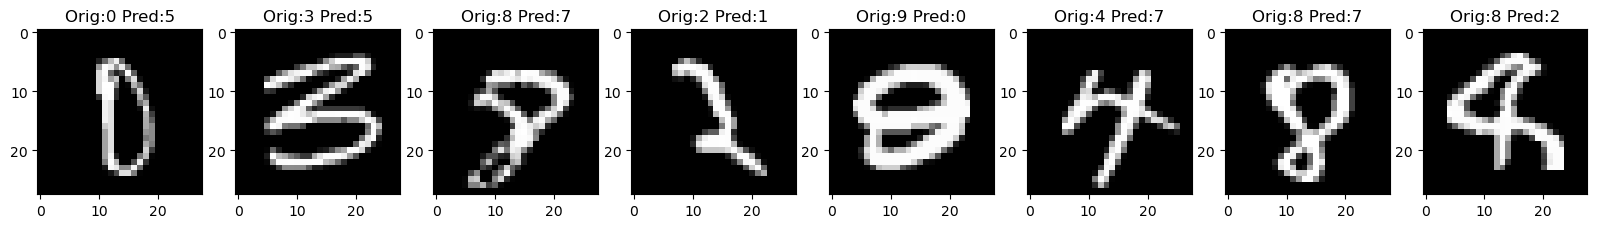

In [60]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1, 9), index_errors[8:16]):
    plt.subplot(1, 8, i)
    plt.imshow(np.reshape(X_test[img_index], (28,28)), cmap=plt.cm.gray)
    plt.title('Orig:' + str(y_test[img_index]) + ' Pred:' + str(y_pred[img_index]))
plt.show()